Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 1 </h2>
    <h1> Enólogo de Datos </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Segundo semestre 2022<br>    
        Fecha de entrega: Viernes 2 de septiembre
    </p>
    <br>
</center>

<br>

---

# Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas. 

**IMPORTANTE**: 
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.


# Librerías

Librerías aceptadas:
- `Numpy`
- `Pandas`
- `Matplotlib`
- `Seaborn`

Clases y funciones aceptadas de la librería `sklearn`:
- `PCA` del módulo `decomposition`
- `TSNE` del módulo `manifold`
- `silhouette_score` del módulo `metrics`
- toda funcíon del módulo `preprocessing`

Librerías y funciones prohibidas:
- Cualquier otra función de `sklearn`
- *Cualquier otra librería que maneje y prediga datos* 

<br>

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score

# Importa aquí las librerías PERMITIDAS que vayas a utilizar

# Introducción

El vino es una bebida que se produce por la fermentación del jugo de la uva y un proceso delicado asociado a ello. Las parras de uva se dan muy bien en climas mediterráneos como en la península ibérica, Italia y la zona centro de Chile. Hoy en día, el vino es uno de los principales productos que hacen que nuestro país sea mundialmente conocido y es sin duda un elemento clave en nuestra cultura y tradiciones.

Junto con el desarrollo tecnológico en el mundo agrícola, se han desarrollado cientos de variedades de uva de vino a lo largo del mundo que tienen como consecuencia la creación de vinos con características muy distintivas.

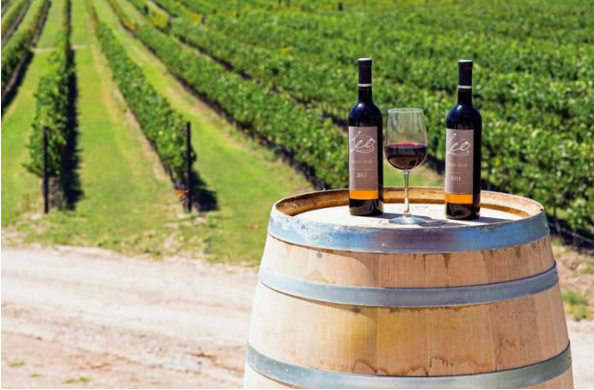

Fuente: brioagropecuario.com

**¿Cuál es tu tarea?**

Como experto en minería de datos, se te encarga trabajar con clusters para agrupar los vinos de la variedad Portuguesa "Vinho Verde" de acuerdo a sus características físicas y químicas.

**Descripción del set de datos:**

El dataset a trabajar proviene de kaggle.com, una plataforma para desarrolladores que buscan aprender sobre manejo de datos y modelos de alta complejidad. En esta tarea, trabajaremos con el *dataset* *winequalityN.csv* (obtenido de [Kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality?resource=download)) que posee información acerca del color, acidez, densidad, pH, entre otras características, de una gran cantidad de muestras de vinos.

# Parte 1: carga y preprocesamiento de datos (1 punto)

## 1.1 Carga de datos

En esta sección debes leer el set de datos utilizando pandas.

In [2]:
# Carga los datos en un dataframe a partir de winequalityN.csv
wines_df = pd.read_csv("C:/Users/Francisco/Desktop/Minería de datos/winequalityN.csv")
wines_df


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## 1.2 Descripción del dataset

En esta parte debes describir en palabras lo que representa el dataset (en específico menciona que describe el dataset en general). Además, elige las tres columnas que consideres más relevantes para clasificar los datos, explica por qué las elegiste y muestra gráficamente los datos de dichas columnas.

En esta base de datos se contiene información de la composición química de 6496 vinos. Además se dan otro tipo de datos como la calidad y el color del vino. Para graficar utilizare las columnas alcohol, type y quality debido a que creo son las variables más importantes a la hora de comprar un vino que están en la base de datos.

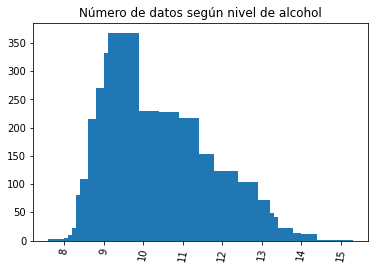

In [3]:
#Datos
alcohol_df = wines_df.groupby(wines_df['alcohol']).size()
plt.bar(alcohol_df.keys(), alcohol_df)

#Diseño del gráfico
plt.rcParams['figure.figsize'] = [10, 5] #Tamaño gráfico
plt.title('Número de datos según nivel de alcohol')
plt.xticks(rotation=80) #Rotación labels

plt.show()

Se puede ver como la mayoría de los vinos tienen entre 8.5 y 11.5 grados de alcohol


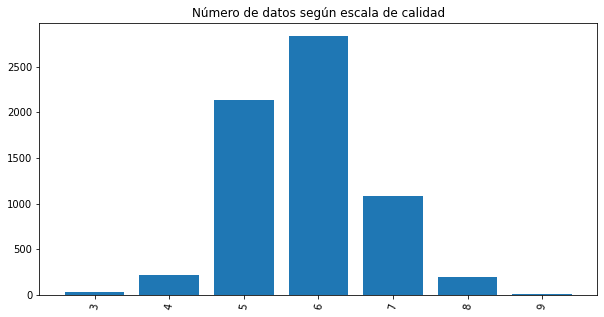

In [4]:
#Datos
quality_df = wines_df.groupby(wines_df['quality']).size()
plt.bar(quality_df.keys(), quality_df)

#Diseño del gráfico
plt.rcParams['figure.figsize'] = [10, 5] #Tamaño gráfico
plt.title('Número de datos según escala de calidad')
plt.xticks(rotation=80) #Rotación labels

plt.show()

Acá vemos que la mayoría de los vinostienen nota 5 o 6. No hay vinos con nota 1, 2 y 10.

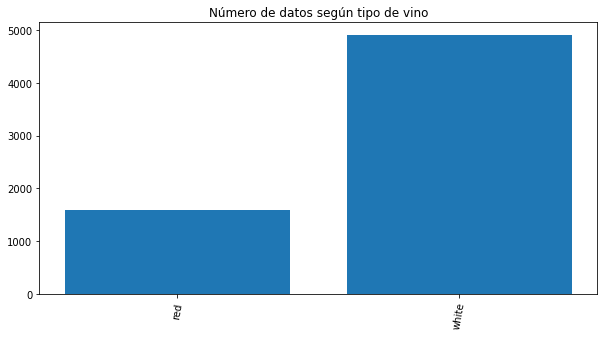

In [5]:
#Datos
type_df = wines_df.groupby(wines_df['type']).size()
plt.bar(type_df.keys(), type_df)

#Diseño del gráfico
plt.rcParams['figure.figsize'] = [10, 10] #Tamaño gráfico
plt.title('Número de datos según tipo de vino')
plt.xticks(rotation=80) #Rotación labels

plt.show()

Por último se puede ver que predominan los vinos blancos.

## 1.3 Manejo de variables cualitativas

En el set de datos existen columnas con valores no numéricos que deberás manipular antes para poder utilizarlas de buena manera. Para esto investiga sobre que hacer con ellas y justifica tus procedimientos. 

**HINT**: investiga sobre One hot encoder y encodings en general, existen librerías buenas para esto en todas partes. Recuerda explicar las decisiones que tomes.

Primero veremos el tipo de datos por columna

In [6]:
wines_df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Agregaremos una columna type_cat para poder trabajar con int en los tipos de vinos. White sera 1 y red 0.

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wines_df['type_cat'] = le.fit_transform(wines_df['type'])
wines_df = pd.DataFrame(wines_df)
wines_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_cat
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


Transformamos los datos a numeros

In [8]:
for feature in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol', 'quality', 'type_cat']:
    pd.to_numeric(wines_df[feature])
wines_df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type_cat                  int32
dtype: object

## 1.4 Limpieza del set de datos

Ahora debes limpiar el set de datos. Para esto determina y justifica que harás con los valores nulos, los outliers, las columnas y filas incompletas, y las características que consideres perjudiciales para el manejo de datos.

Primero veremos si hay valores nulos.

In [9]:
wines_df[wines_df.isnull().any(axis=1)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_cat
17,white,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8,1
33,white,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6,1
54,white,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6,1
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6,1
98,white,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,4,1
139,white,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6,1
174,white,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5,1
224,white,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6,1
249,white,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5,1
267,white,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5,1


Vemos que si hay pero no son muchos, por lo que eiminaremos las filas con nulos

In [10]:
wines_df = wines_df.dropna()
wines_df[wines_df.isnull().any(axis=1)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_cat


Ahora detectaremos y eliminaremos los outliers (https://www.youtube.com/watch?v=Vc4cXIAa69Y)

In [11]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

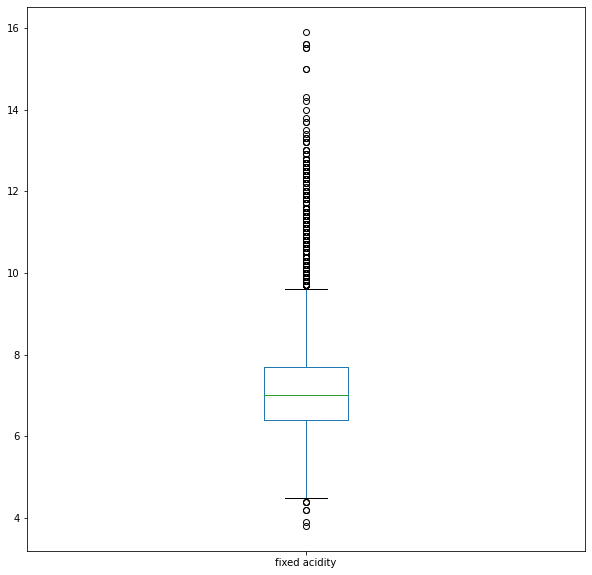

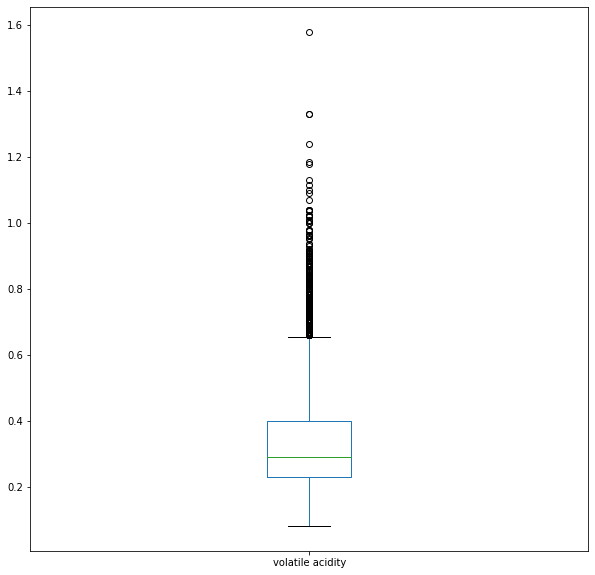

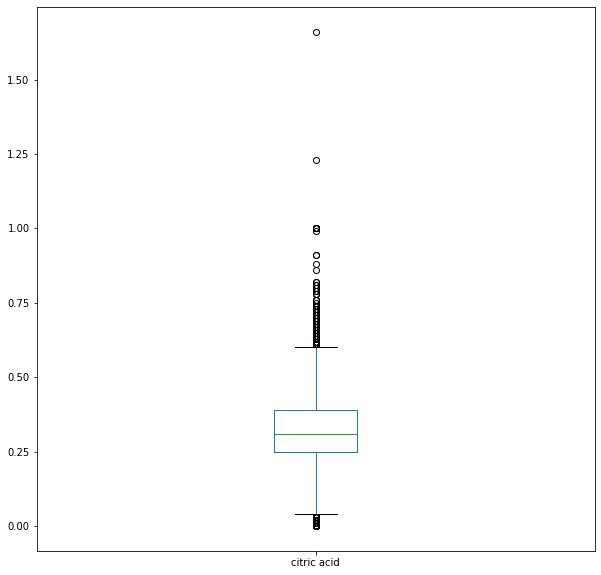

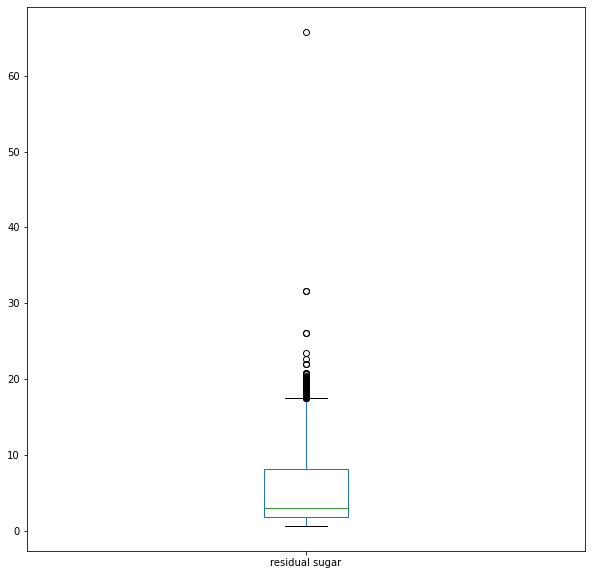

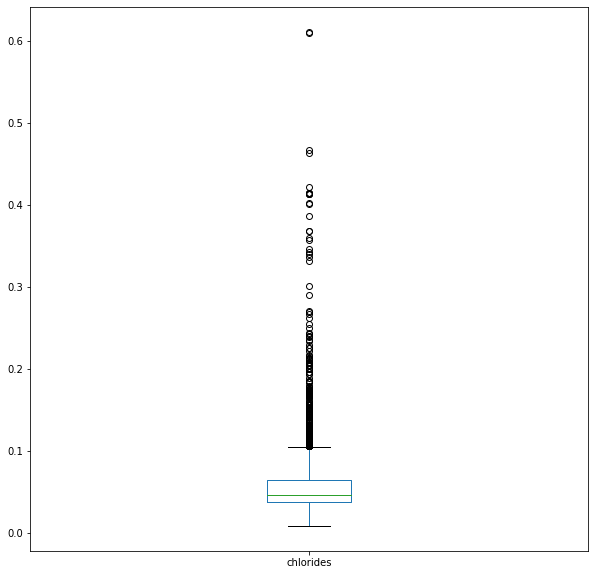

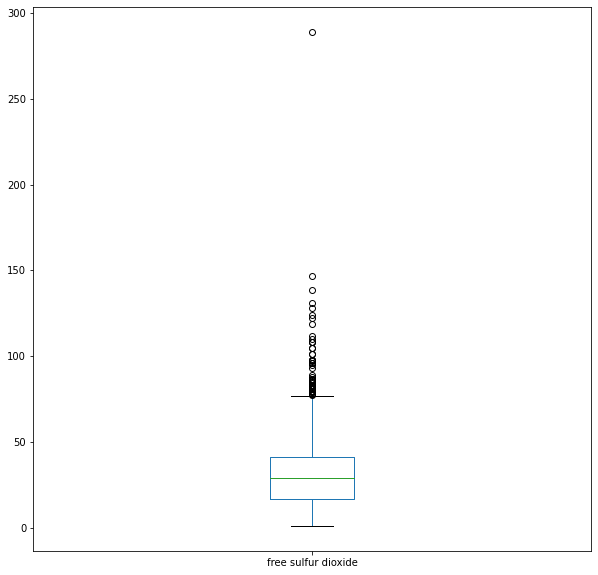

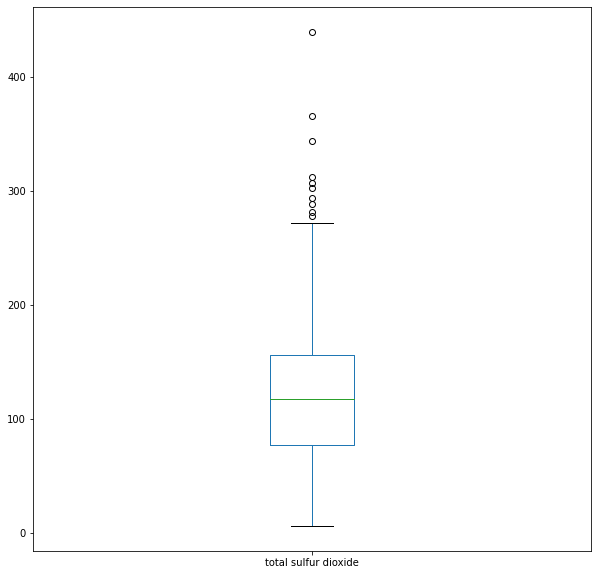

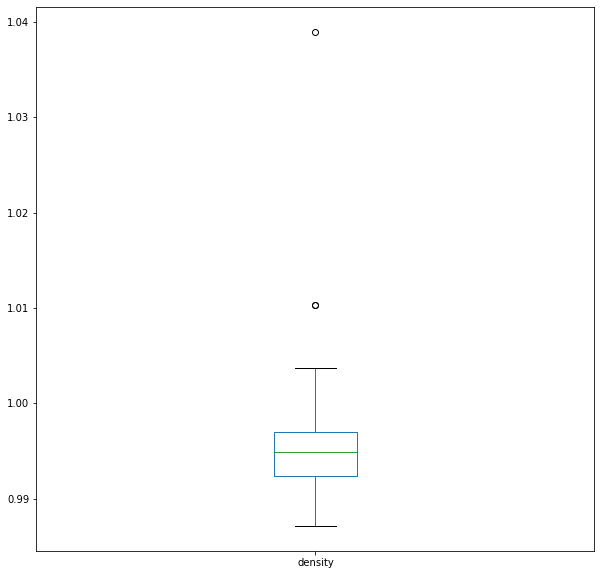

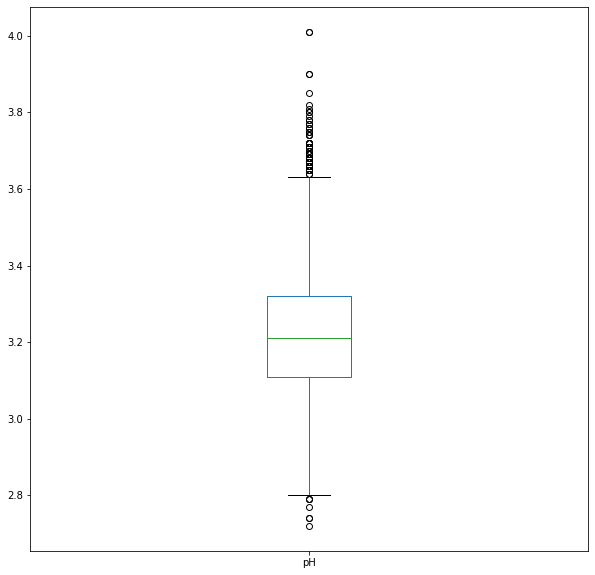

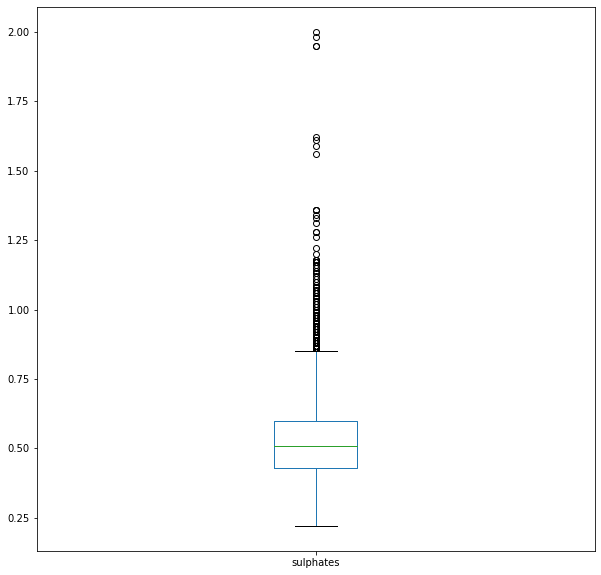

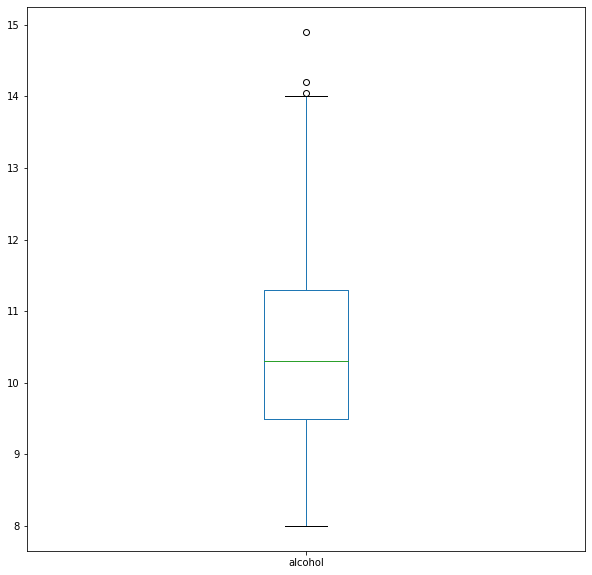

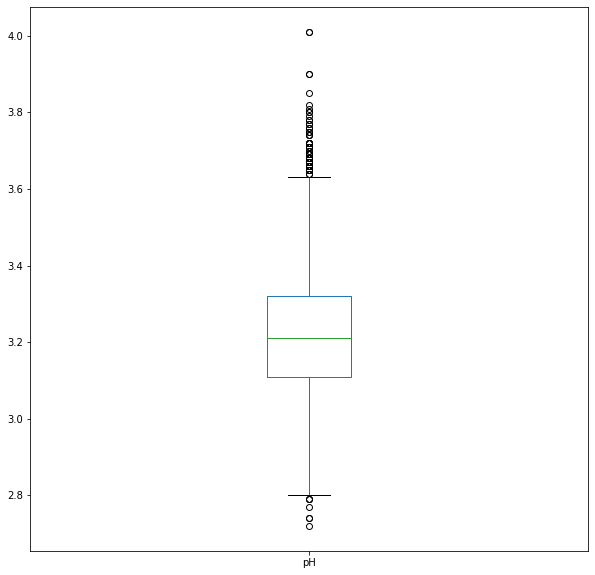

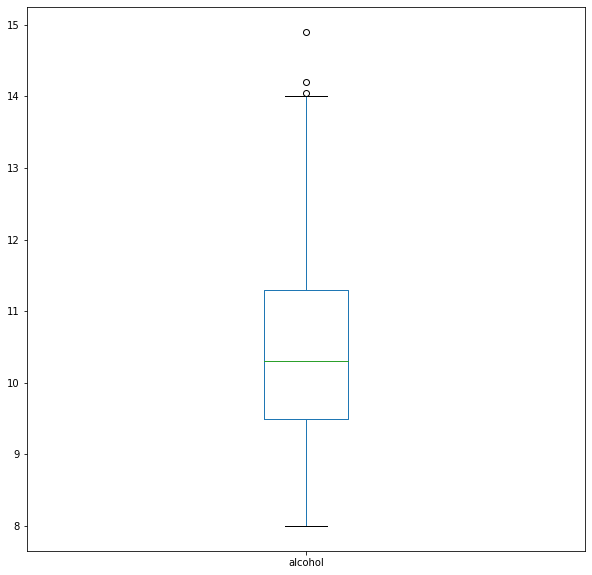

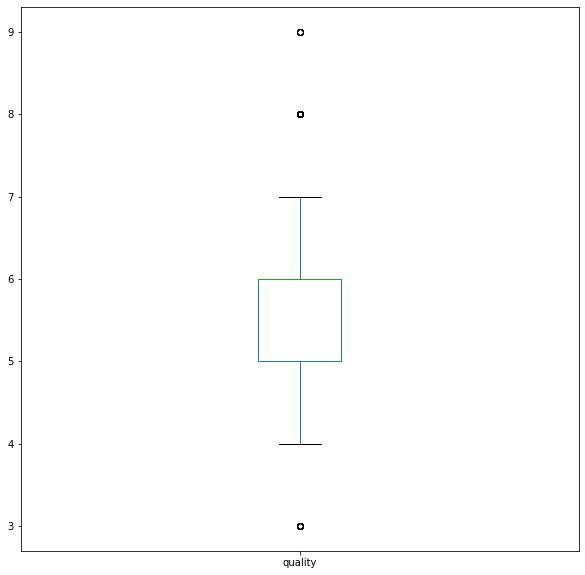

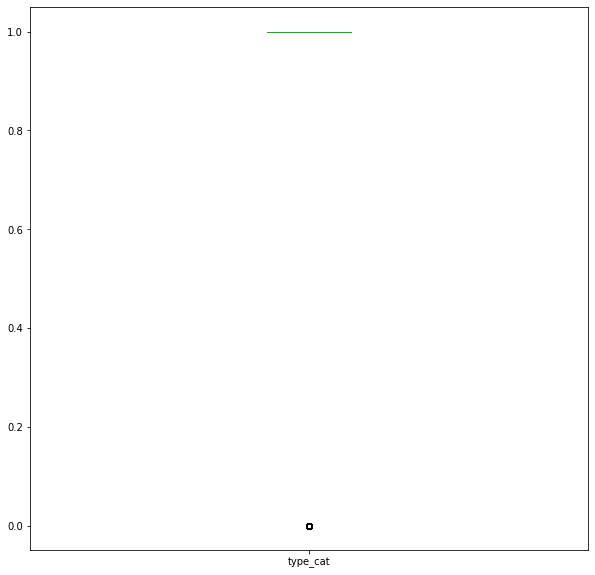

In [12]:
plot_boxplot(wines_df, "fixed acidity")
plot_boxplot(wines_df, "volatile acidity")
plot_boxplot(wines_df, "citric acid")
plot_boxplot(wines_df, "residual sugar")
plot_boxplot(wines_df, "chlorides")
plot_boxplot(wines_df, "free sulfur dioxide")
plot_boxplot(wines_df, "total sulfur dioxide")
plot_boxplot(wines_df, "density")
plot_boxplot(wines_df, "pH")
plot_boxplot(wines_df, "sulphates")
plot_boxplot(wines_df, "alcohol")
plot_boxplot(wines_df, "pH")
plot_boxplot(wines_df, "alcohol")
plot_boxplot(wines_df, "quality")
plot_boxplot(wines_df, "type_cat")

Podemos ver que hay outliers, por lo que procederemos a sacarlos

In [13]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.15)
    Q3 = df[ft].quantile(0.85)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [14]:
index_list = []
for feature in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol', 'quality', 'type_cat']:
    index_list.extend(outliers(wines_df, feature))
index_list = list(dict.fromkeys(index_list))
print(len(index_list))

326


Removeremos los datos que esten sobre el percentil 0.8 y bajo el percentil 0.2. Estos son 276, lo que no es un numero muy grande en comparacion a los mas de 6000 totales.

In [15]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return(df)

In [16]:
wines_df = remove(wines_df, index_list)
wines_df = pd.DataFrame(wines_df)
wines_df.shape

(6137, 14)

Vemos que se removieron exitosamente

## 1.5 Normalización de datos

Normaliza las columnas del set de datos que consideres necesarias, justifica tus decisiones y explica por qué es útil realizar esta acción. Sumado a lo anterior, menciona los principales beneficios de trabajar con columnas que posean valores normalizados.

Normalizare todas las columnas menos la columna type (strings). Con esto tendremos la misma escala de valores para todas las variables del problema, lo que nos permitira ver las correlaciones de una mejor manera. (https://www.youtube.com/watch?v=RyUQT7SqmyI)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
wines_n = wines_df
wines_n.drop('type', inplace=True, axis=1)
wines_n = scaler.fit_transform(wines_n)
wines_n = pd.DataFrame(wines_n)
wines_n.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.426667,0.212291,0.444444,0.877729,0.262774,0.44,0.454924,0.880228,0.247788,0.267442,0.129032,0.5,1.0
1,0.333333,0.245810,0.419753,0.043668,0.291971,0.13,0.349515,0.436629,0.513274,0.313953,0.241935,0.5,1.0
2,0.573333,0.223464,0.493827,0.275109,0.299270,0.29,0.252427,0.506337,0.477876,0.255814,0.338710,0.5,1.0
3,0.453333,0.167598,0.395062,0.344978,0.357664,0.46,0.499307,0.538023,0.415929,0.209302,0.306452,0.5,1.0
4,0.453333,0.167598,0.395062,0.344978,0.357664,0.46,0.499307,0.538023,0.415929,0.209302,0.306452,0.5,1.0


(https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn)

# Parte 2: PCA y t-SNE (1 punto)
En esta sección debes reducir la dimensionalidad (**n**) del dataset preprocesado en la parte anterior utilizando PCA y t-SNE. En específico, debes obtener 4 *datasets*:
- n=2, utilizando PCA
- n=2, utilizando t-SNE
- n=8, utilizando PCA
- n=8, utilizando t-SNE

Guarda estos datasets en variables distintas, deberás utilizarlos más adelante. Justifica las decisiones que tomes con respecto a otros parámetros de PCA y t-SNE.

Utilizaremos todas las variables obtenidas en la normalizacion (https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60). 

Debido a que el T-SNE no corre con todos los datos, se decidio utilizar el 35% de las filas. Estas se eligiran de manera random. Esto se permitio en el foro de la tarea.

In [18]:
wines_n = wines_n.sample(frac = 0.35)

Para los PCA se utiliza el metodo default solo variando el n, en cambio para los TSNE se utiliza learning_rate = auto, perplexity = 30, n_iter = 250 y init="random" con el objetivo de que corra más rápido el algoritmo. Recordar que TSNE demora más tiempo que PCA. Además para TSNE de 8 componentes se utiliza el método exact enves de barnes_hut debido a que barnes_hut solo permite tener máximo 4 componentes.

In [19]:
# n=2, utilizando PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(wines_n)
pca_n2 = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2'])
pca_n2.head()

,component 1,component 2
0,-0.273013,0.316289
1,-0.316784,0.246399
2,0.830728,-0.068441
3,-0.237811,-0.019739
4,-0.218823,-0.145919


Para TSNE utilice https://www.youtube.com/watch?v=85XaciPBCkw

In [20]:
# n=2, utilizando t-SNE
m = TSNE(n_components=2, learning_rate="auto", perplexity=30, n_iter=250, init="random")
PrincipalComponents = m.fit_transform(wines_n)
tsne_n2 = pd.DataFrame(data = PrincipalComponents, columns = ['component 1', 'component 2'])
tsne_n2.head()

,component 1,component 2
0,-0.875435,-0.738389
1,-0.878676,-0.727517
2,3.787432,0.160145
3,-1.055391,-0.056807
4,-1.122941,0.199592


In [21]:
# n=8, utilizando PCA
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(wines_n)
pca_n8 = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2', 'component 3', 'component 4', 'component 5', 'component 6', 'component 7', 'component 8'])
pca_n8.head()

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8
0,-0.273013,0.316289,-0.145813,0.003501,-0.020147,-0.118623,-0.090160,0.065514
1,-0.316784,0.246399,0.045478,0.080228,0.136343,0.098673,-0.016161,0.120393
2,0.830728,-0.068441,0.380425,-0.129240,-0.071996,0.106022,-0.151220,-0.093194
3,-0.237811,-0.019739,-0.225773,-0.168260,-0.053886,-0.044876,-0.142978,0.019580
4,-0.218823,-0.145919,0.272772,-0.325288,0.201790,-0.022951,0.008990,0.287458


In [22]:
# n=8, utilizando t-SNE
m = TSNE(n_components=8, learning_rate=250, perplexity=30, n_iter=250, init="random", method='exact')
PrincipalComponents = m.fit_transform(wines_n)
tsne_n8 = pd.DataFrame(data = PrincipalComponents, columns = ['component 1', 'component 2', 'component 3', 'component 4', 'component 5', 'component 6', 'component 7', 'component 8'])
tsne_n8.head()

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8
0,0.312900,-0.160925,0.313628,0.163625,-0.145343,0.822914,-0.030483,-0.378971
1,0.303135,-0.161430,0.316546,0.160305,-0.145325,0.810640,-0.030159,-0.378031
2,0.621898,0.656770,-1.606230,-0.003482,0.534300,-0.860625,0.051995,1.247270
3,-0.158723,-0.178789,0.439490,0.006799,-0.147416,0.257179,-0.014728,-0.343497
4,-0.339762,-0.184965,0.486801,-0.053463,-0.147705,0.039180,-0.008641,-0.329313


# Parte 3: *Clustering* (2 puntos)
En esta sección debes implementar los algoritmos de *clustering* k-means y k-medoids vistos en clases.

## 3.1 K-means

A modo de referencia, puedes utilizar el siguiente pseudocódigo como guía en tu implementación de k-means:

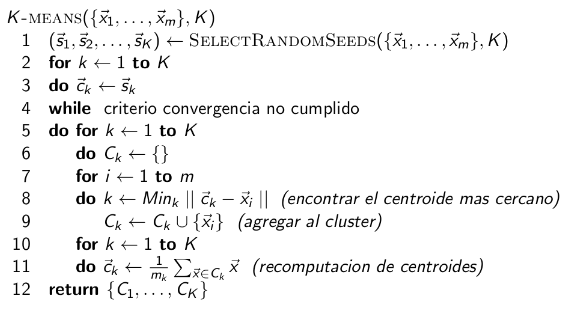

Deberás completar los métodos fit y predict de la siguiente clase. Puedes crear otras funciones, métodos y agregar parámetros a la clase como estimes conveniente. Sin embargo, es **obligatorio** que:
1. El método fit debe calcular los clusters empleando **k-means con un número máximo de iteraciones** como criterio de convergencia.
2. El método fit debe aceptar cualquier matriz de datos X. NO está permitido *hardcodear* dimensiones!
3. El método predict debe retornar los clusters a los que pertenece cada dato en X.

Se utilizo https://www.youtube.com/watch?v=W4fSRHeafMo

In [23]:
class Kmeans:
    def __init__(self, X, k, max_iterations=1000, randomstate=18):
        self.K = k
        self.plot_figure = True
        self.max_iterations = max_iterations
        self.randomstate = randomstate
        self.num_examples = X.shape[0]
        self.num_features = X.shape[1]

    # Inicializamos con centroides iguales a 0
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features))

        for k in range(self.K):
            centroid = X[np.random.choice(range(self.num_examples))]
            centroids[k] = centroid

        return centroids

    def create_clusters(self, X, centroids):
        #generamos una lista de punteros asociados a cada cluster
        clusters = [[] for _ in range(self.K)]
        #iteramos cada puntero para ver el cluster más cercano
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)

        return clusters
    #calculamos nuevos centroides con la media de los datos de cada cluster
    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid

        return centroids
    #con esto obtenemos a que cluster pertenece cada dato
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx

        return y_pred
    #para poder graficar
    def plot_fig(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()
    #con esto iteramos las funciones anteriormente hechas con el objetivo de ir acomodando la posición del centroide
    def fit(self, X):
        np.random.seed(self.randomstate)
        centroids = self.initialize_random_centroids(X)

        for it in range(self.max_iterations):
            clusters = self.create_clusters(X, centroids)

            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)

            diff = centroids - previous_centroids

            if not diff.any():
                return clusters
                break


## 3.2 K-medoids

Ahora, deberás implementar el algoritmo k-medoids completando la siguiente clase. Recuerda que este algoritmo es una variante de k-means donde se utilizan puntos como centroides en vez del promedio de cada *cluster*. 

**HINT**: Solo deberían cambiar las líneas 1 y 11 del pseudocódigo mostrado en la parte 3.1

Puedes crear otras funciones, métodos y agregar parámetros a la clase como estimes conveniente. Sin embargo, es **obligatorio** que:
1. El método fit debe calcular los clusters empleando **k-medoids con un número máximo de iteraciones como criterio de convergencia**.
2. El método fit debe aceptar cualquier matriz de datos X. NO está permitido *hardcodear* dimensiones!
3. El método predict debe retornar los clusters a los que pertenece cada dato en X.

Se utilizo https://dataqoil.com/2022/02/04/k-medoids-clustering-in-python-from-scratch/

In [24]:
#Es similar a lo hecho con Kmeans con la diferencia de que para calcular el centroide se toma en cuenta la mediana de los
#Clusters en vez de la media

class Kmedoids:
    def __init__(self, X, k, max_iterations=1000, randomstate=18):
        self.K = k
        self.plot_figure = True
        self.max_iterations = max_iterations
        self.randomstate = randomstate
        self.num_examples = X.shape[0]
        self.num_features = X.shape[1]

    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features))

        for k in range(self.K):
            centroid = X[np.random.choice(range(self.num_examples))]
            centroids[k] = centroid

        return centroids

    def create_clusters(self, X, centroids):
        clusters = [[] for _ in range(self.K)]

        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point - centroids) ** 2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)

        return clusters

# En esta funcion es donde se diferencia kmedois de kmeans. 
# En vez de seleccionar el promedio, seleccionaremos la mediana del cluster.
    def calculate_new_centroids(self, clusters, X):
        centroids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.median(X[cluster], axis=0)
            centroids[idx] = new_centroid
            
        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx

        return y_pred

    def plot_fig(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
        plt.show()

    def fit(self, X):
        np.random.seed(self.randomstate)
        centroids = self.initialize_random_centroids(X)

        for it in range(self.max_iterations):
            clusters = self.create_clusters(X, centroids)

            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)

            diff = centroids - previous_centroids

            if not diff.any():
                return clusters
                break
        return clusters

# Parte 4: Búsqueda de prototipos y *silhouette score* (2 puntos)

## 4.1 Prototipos 
En esta sección debes buscar óptimos locales para el número de clusters (**parámetro k**) utilizando la métrica [silhoutte score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#:~:text=The%20Silhouette%20Coefficient%20is%20calculated,is%20not%20a%20part%20of.). En especifico, para cada dataset obtenido en la parte 2 y para cada algoritmo de clustering de la parte 3 debes:
1. Iterar sobre un rango de valores para k que estimes conveniente. Debes justificar tu decisión, sin embargo la búsqueda debe ser lo suficientemente exhaustiva.
2. Obtener los *clusters* con el algoritmo respectivo.
3. Calcular el *silhoutte score*.
4. Registrar en alguna estructura de datos el puntaje para cada k.

En total deberías realizar 8 búsquedas.

primero veremos los scores de KMeans con k entre 2 y 8:

In [25]:
list_s = []

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

for i in [2, 3, 4, 5, 6, 7, 8]:
    for j in [pca_n2, pca_n8, tsne_n2, tsne_n8]:
        kmeans = Kmeans(j.to_numpy(), i)
        clusters = kmeans.fit(j.to_numpy())
        labels = kmeans.predict_cluster(clusters, j.to_numpy())
        list_s.append({'name':namestr(j, globals()), 'k':i, 'algoritmo': 'kmeans', 'score':silhouette_score(j, labels)})
print(list_s)

[{'name': ['pca_n2', 'j'], 'k': 2, 'algoritmo': 'kmeans', 'score': 0.7073499613155978}, {'name': ['pca_n8', 'j'], 'k': 2, 'algoritmo': 'kmeans', 'score': 0.5199744742725506}, {'name': ['tsne_n2', 'j'], 'k': 2, 'algoritmo': 'kmeans', 'score': 0.88468474}, {'name': ['tsne_n8', 'j'], 'k': 2, 'algoritmo': 'kmeans', 'score': 0.8102521}, {'name': ['pca_n2', 'j'], 'k': 3, 'algoritmo': 'kmeans', 'score': 0.6195178220928365}, {'name': ['pca_n8', 'j'], 'k': 3, 'algoritmo': 'kmeans', 'score': 0.34201220946264643}, {'name': ['tsne_n2', 'j'], 'k': 3, 'algoritmo': 'kmeans', 'score': 0.75910616}, {'name': ['tsne_n8', 'j'], 'k': 3, 'algoritmo': 'kmeans', 'score': 0.758325}, {'name': ['pca_n2', 'j'], 'k': 4, 'algoritmo': 'kmeans', 'score': 0.5574187714300468}, {'name': ['pca_n8', 'j'], 'k': 4, 'algoritmo': 'kmeans', 'score': 0.27900413730985724}, {'name': ['tsne_n2', 'j'], 'k': 4, 'algoritmo': 'kmeans', 'score': 0.69996303}, {'name': ['tsne_n8', 'j'], 'k': 4, 'algoritmo': 'kmeans', 'score': 0.70303893}

Ahora veremos los KMedoids desde el k 2 al 8:

In [26]:
for i in [2, 3, 4, 5, 6, 7, 8]:
    for j in [pca_n2, pca_n8, tsne_n2, tsne_n8]:
        kmedoids = Kmedoids(j.to_numpy(), i, max_iterations=1000)
        clusters = kmedoids.fit(j.to_numpy())
        labels = kmedoids.predict_cluster(clusters, j.to_numpy())
        list_s.append({'name':namestr(j, globals()), 'k':i, 'algoritmo': 'kmedoids', 'score':silhouette_score(j, labels)})
print(list_s)

[{'name': ['pca_n2', 'j'], 'k': 2, 'algoritmo': 'kmeans', 'score': 0.7073499613155978}, {'name': ['pca_n8', 'j'], 'k': 2, 'algoritmo': 'kmeans', 'score': 0.5199744742725506}, {'name': ['tsne_n2', 'j'], 'k': 2, 'algoritmo': 'kmeans', 'score': 0.88468474}, {'name': ['tsne_n8', 'j'], 'k': 2, 'algoritmo': 'kmeans', 'score': 0.8102521}, {'name': ['pca_n2', 'j'], 'k': 3, 'algoritmo': 'kmeans', 'score': 0.6195178220928365}, {'name': ['pca_n8', 'j'], 'k': 3, 'algoritmo': 'kmeans', 'score': 0.34201220946264643}, {'name': ['tsne_n2', 'j'], 'k': 3, 'algoritmo': 'kmeans', 'score': 0.75910616}, {'name': ['tsne_n8', 'j'], 'k': 3, 'algoritmo': 'kmeans', 'score': 0.758325}, {'name': ['pca_n2', 'j'], 'k': 4, 'algoritmo': 'kmeans', 'score': 0.5574187714300468}, {'name': ['pca_n8', 'j'], 'k': 4, 'algoritmo': 'kmeans', 'score': 0.27900413730985724}, {'name': ['tsne_n2', 'j'], 'k': 4, 'algoritmo': 'kmeans', 'score': 0.69996303}, {'name': ['tsne_n8', 'j'], 'k': 4, 'algoritmo': 'kmeans', 'score': 0.70303893}

## 4.2 Preguntas
Responde las siguientes preguntas a partir de la información obtenida en la sección anterior y la materia vista en clases. Te recomendamos utilizar gráficos, métricas y cualquier otro recurso que apoye tu respuesta. Recuerda citar las fuentes externas que utilices.

**Pregunta 1:** Para cada uno de los 4 *datasets* reducidos, ¿Cual es el óptimo local para el número k de clusters? Justifica tu respuesta. Compara los resultados de ambos algoritmos de clustering.

Respuesta: Para esto ordenaremos la lista que obtuvimos por score. Mientras más cercano al 1 significa que todo funciono mejor.

In [27]:
sortlist = sorted(list_s, key=lambda d: d['score'], reverse=True)
print(sortlist)

[{'name': ['tsne_n2', 'j'], 'k': 2, 'algoritmo': 'kmeans', 'score': 0.88468474}, {'name': ['tsne_n8', 'j'], 'k': 2, 'algoritmo': 'kmeans', 'score': 0.8102521}, {'name': ['tsne_n2', 'j'], 'k': 3, 'algoritmo': 'kmeans', 'score': 0.75910616}, {'name': ['tsne_n2', 'j'], 'k': 3, 'algoritmo': 'kmedoids', 'score': 0.75910616}, {'name': ['tsne_n8', 'j'], 'k': 3, 'algoritmo': 'kmedoids', 'score': 0.7585482}, {'name': ['tsne_n8', 'j'], 'k': 3, 'algoritmo': 'kmeans', 'score': 0.758325}, {'name': ['pca_n2', 'j'], 'k': 2, 'algoritmo': 'kmeans', 'score': 0.7073499613155978}, {'name': ['tsne_n8', 'j'], 'k': 4, 'algoritmo': 'kmeans', 'score': 0.70303893}, {'name': ['tsne_n8', 'j'], 'k': 4, 'algoritmo': 'kmedoids', 'score': 0.7028879}, {'name': ['tsne_n2', 'j'], 'k': 4, 'algoritmo': 'kmedoids', 'score': 0.70007706}, {'name': ['tsne_n2', 'j'], 'k': 4, 'algoritmo': 'kmeans', 'score': 0.69996303}, {'name': ['tsne_n8', 'j'], 'k': 5, 'algoritmo': 'kmedoids', 'score': 0.68055886}, {'name': ['tsne_n8', 'j'], 

Podemos ver que el óptimo local de ambos algoritmos esta con k=2. Kmeans se comporto levemente mejor con k=2 que Kmedoids. Además se observo que estos dos óptimos locales fueron realizados con tsne_n2.

**Pregunta 2:** Según lo observado en la sección 4.1 ¿Como afecta la reducción utilizada (PCA o t-SNE) en los resultados de los algoritmos de clustering? Compara los resultados para un mismo número de dimensiones y justifica tu respuesta.

Respuesta:

Vemos que tsne obtuvo mucho mejores resultados. Los óptimos utilizaron este método en n=2. Comparando en Kmeans k=2, pca_n2 obtuvo un score de 0.7070913908802359, esto es menor al 0.88954705 obtenido por tsne_n2. En Kmedoids k=2 ocurre lo mismo. pca_n2 obtiene 0.7070913908802359 mientras que tsne_n2 obtiene 0.88954705. Luego en n8 también hay superioridad de tsne. Podemos concluir que tsne fue mejor.